# Netflix Customer Churn Analysis

**Author:** Sarah Howard 

**Date:** November 3, 2025

**Objective:** Perform an analysis of customer churn

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [2]:
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Section 1. Import and Inspect the Data

### 1.1 Load the Netflix Customer Churn data

In [3]:
# Load the Netflix Customer Churn data from the data folder
df = pd.read_csv(r"C:\Repos\Netflix_Customer_Churn\data\netflix_large_user_data.csv", delimiter=",")

# Display info
df.info()

# Display the first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         1000 non-null   object 
 1   Subscription Length (Months)        1000 non-null   int64  
 2   Customer Satisfaction Score (1-10)  1000 non-null   int64  
 3   Daily Watch Time (Hours)            1000 non-null   float64
 4   Engagement Rate (1-10)              1000 non-null   int64  
 5   Device Used Most Often              1000 non-null   object 
 6   Genre Preference                    1000 non-null   object 
 7   Region                              1000 non-null   object 
 8   Payment History (On-Time/Delayed)   1000 non-null   object 
 9   Subscription Plan                   1000 non-null   object 
 10  Churn Status (Yes/No)               1000 non-null   object 
 11  Support Queries Logged              1000 non

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,C00001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,No,10,33,6250,5,2
1,C00002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28,7018,1,5
2,C00003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18,1055,1,5
3,C00004,3,7,3.00,9,Smart TV,Drama,Europe,Delayed,Premium,No,5,32,6707,5,4
4,C00005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59,1506,3,5
5,C00006,3,4,4.95,3,Tablet,Romance,Africa,Delayed,Basic,Yes,7,69,5581,4,3
6,C00007,12,4,0.71,3,Tablet,Thriller,Africa,Delayed,Standard,No,3,25,2238,2,3
7,C00008,6,5,3.54,2,Laptop,Romance,South America,On-Time,Standard,Yes,4,49,3630,5,3
8,C00009,6,9,3.79,1,Laptop,Drama,Africa,On-Time,Basic,Yes,6,27,4535,1,4
9,C00010,3,6,3.61,6,Laptop,Action,North America,On-Time,Premium,No,0,56,7395,2,1


### 1.2 Check for missing and/or duplicate values

In [4]:
# Check for missing statistics
df.isnull().values.any()
df.isnull().sum()/df.shape[0]

Customer ID                           0.0
Subscription Length (Months)          0.0
Customer Satisfaction Score (1-10)    0.0
Daily Watch Time (Hours)              0.0
Engagement Rate (1-10)                0.0
Device Used Most Often                0.0
Genre Preference                      0.0
Region                                0.0
Payment History (On-Time/Delayed)     0.0
Subscription Plan                     0.0
Churn Status (Yes/No)                 0.0
Support Queries Logged                0.0
Age                                   0.0
Monthly Income ($)                    0.0
Promotional Offers Used               0.0
Number of Profiles Created            0.0
dtype: float64

In [5]:
# Check for duplicates
df.drop_duplicates(inplace = True)

### 1.3 Display basic summary statistics

In [6]:
# Display summary statistics
print(df.describe())

       Subscription Length (Months)  Customer Satisfaction Score (1-10)  \
count                    1000.00000                         1000.000000   
mean                        9.17700                            5.379000   
std                         8.21859                            2.856487   
min                         1.00000                            1.000000   
25%                         3.00000                            3.000000   
50%                         6.00000                            5.000000   
75%                        12.00000                            8.000000   
max                        24.00000                           10.000000   

       Daily Watch Time (Hours)  Engagement Rate (1-10)  \
count               1000.000000             1000.000000   
mean                   2.829420                5.511000   
std                    1.302673                2.871607   
min                    0.500000                1.000000   
25%                    1.6500

### 1.4 Checking for unique values

In [7]:
# Check for unique values for Payment History and Churn Status

print("Unique Payment History values:", df["Payment History (On-Time/Delayed)"].unique())
print("Unique Subscription Plan values:", df["Subscription Plan"].unique())
print("Unique Churn Status values:", df["Churn Status (Yes/No)"].unique())

Unique Payment History values: ['On-Time' 'Delayed']
Unique Subscription Plan values: ['Basic' 'Premium' 'Standard']
Unique Churn Status values: ['No' 'Yes']


### 1.5 Converting data from categorical to numeric

In [8]:
# Convert categorical to numeric using mapping
payment_mapping = {"On-Time": 1, "Delayed": 0}
subscription_mapping = {"Basic": 0, "Standard": 1, "Premium": 2}
churn_mapping = {"Yes": 1, "No": 0}

# Apply mappings
df["Payment History (Numeric)"] = df["Payment History (On-Time/Delayed)"].map(payment_mapping)
df["Subscription Plan (Numeric)"] = df["Subscription Plan"].map(subscription_mapping)
df["Churn Status (Numeric)"] = df["Churn Status (Yes/No)"].map(churn_mapping)

In [9]:
# Show before and after for verification
print(df[["Payment History (On-Time/Delayed)", "Payment History (Numeric)"]].head())
print(df[["Subscription Plan", "Subscription Plan (Numeric)"]].head())
print(df[["Churn Status (Yes/No)", "Churn Status (Numeric)"]].head())

  Payment History (On-Time/Delayed)  Payment History (Numeric)
0                           On-Time                          1
1                           On-Time                          1
2                           On-Time                          1
3                           Delayed                          0
4                           On-Time                          1
  Subscription Plan  Subscription Plan (Numeric)
0             Basic                            0
1             Basic                            0
2           Premium                            2
3           Premium                            2
4          Standard                            1
  Churn Status (Yes/No)  Churn Status (Numeric)
0                    No                       0
1                   Yes                       1
2                   Yes                       1
3                    No                       0
4                   Yes                       1


## Section 2. Exploratory Data Analysis

### 2.1 Generating histograms

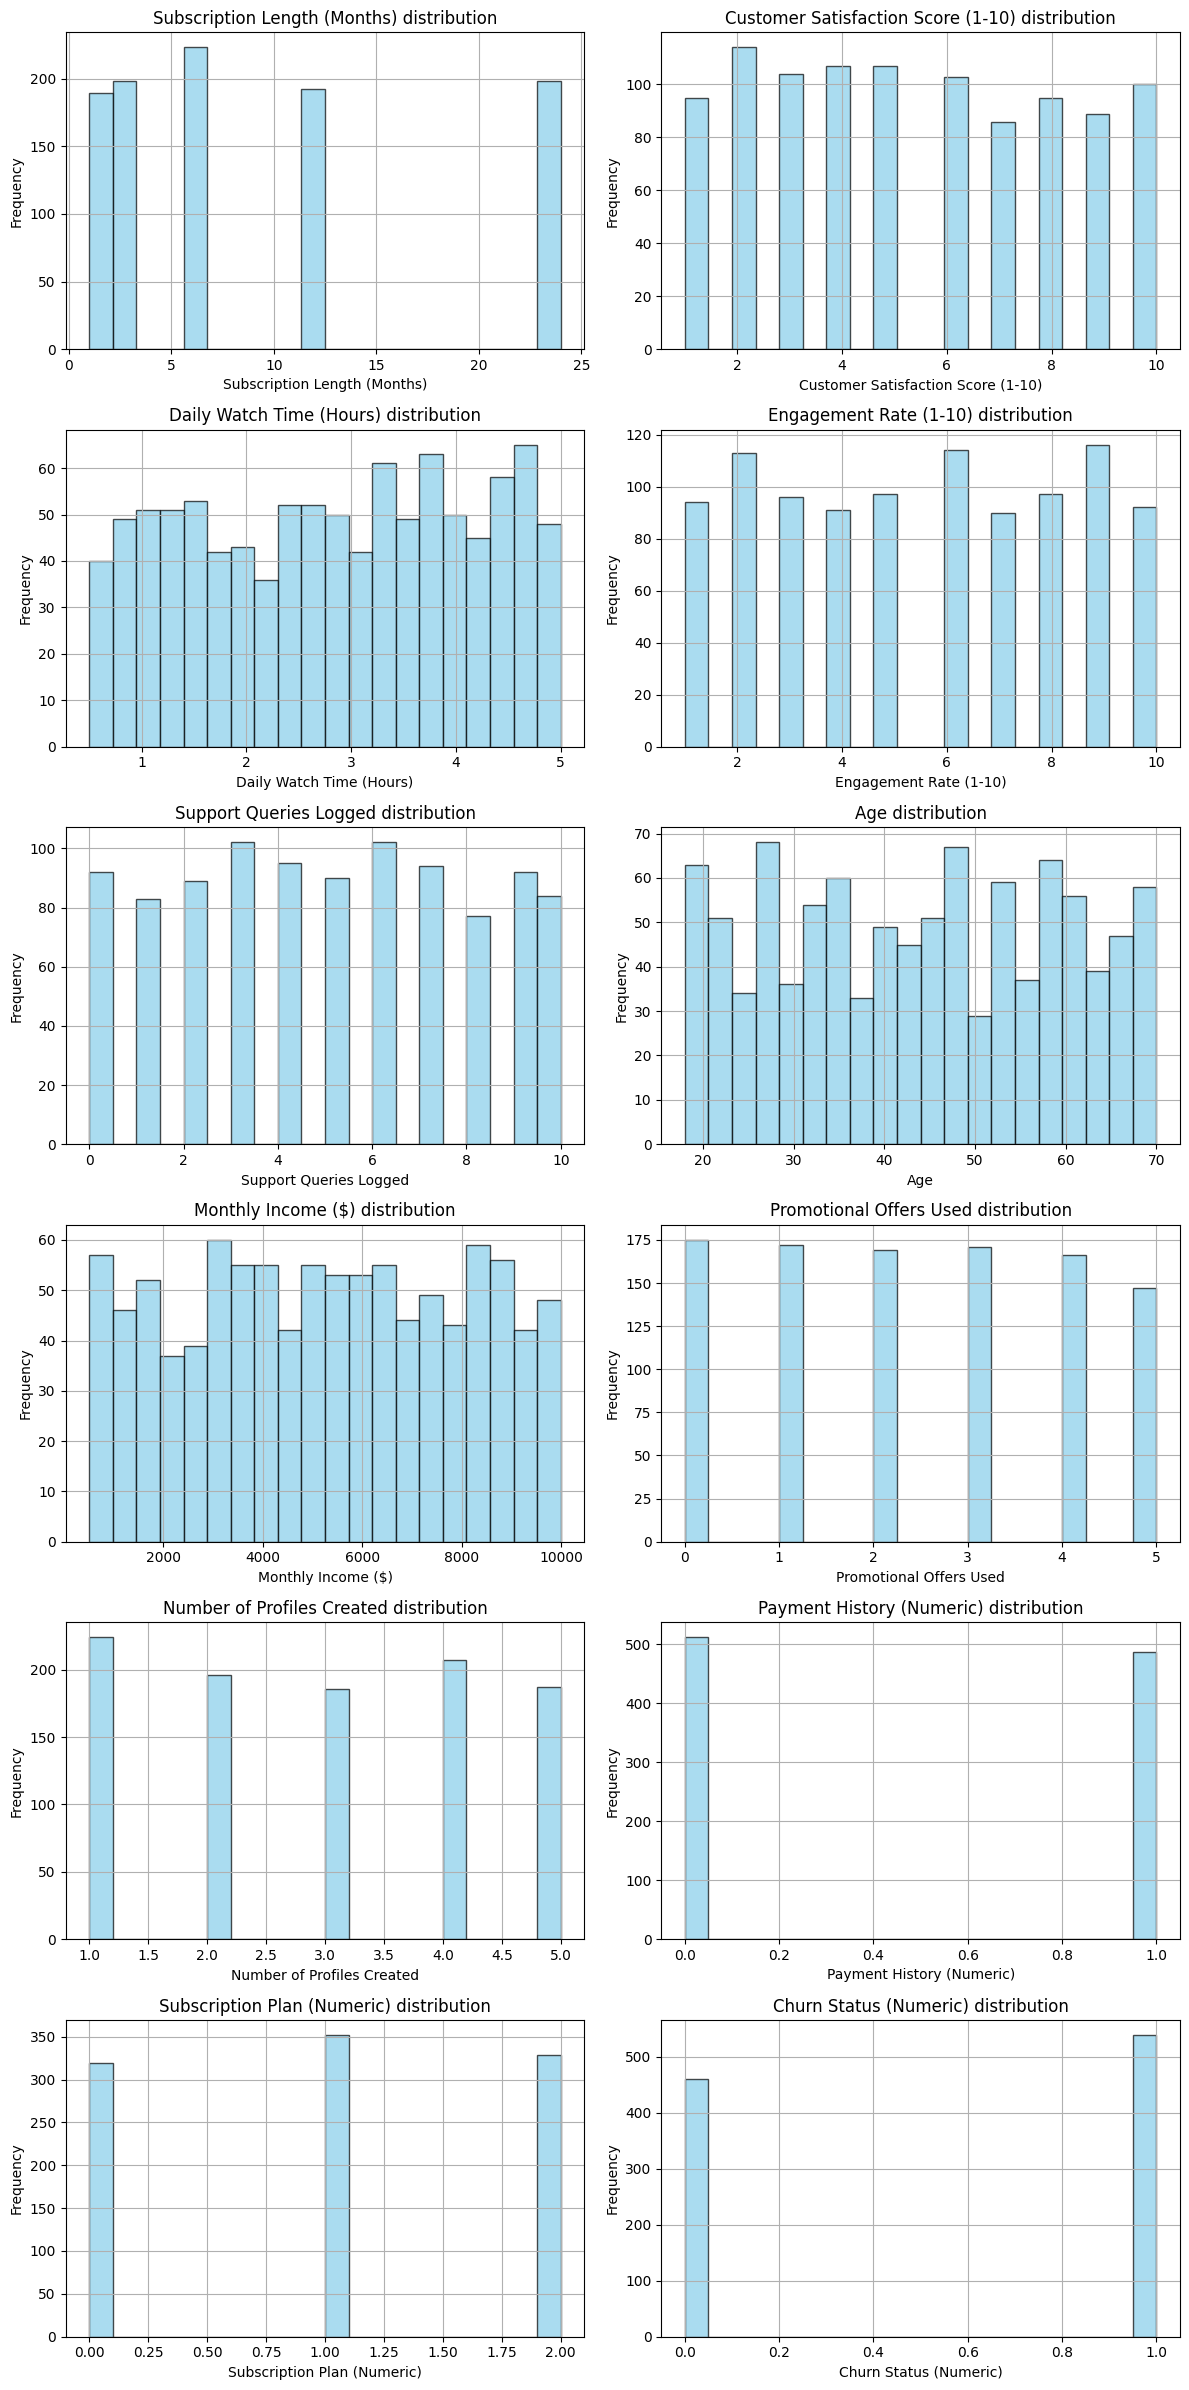

In [10]:
# Generate histograms
# Generate histograms for all numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set up the figure size based on number of columns
n_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n_cols + 1) // 2, ncols=2, figsize=(12, 4 * ((n_cols + 1) // 2)))
axes = axes.flatten()  # Flatten in case of single row

for i, col in enumerate(numeric_cols):
    df[col].hist(
        bins=20,                  # More bins for detail
        ax=axes[i],
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )
    axes[i].set_title(f'{col} distribution', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Folder to save images
output_folder = Path("histograms")
output_folder.mkdir(parents=True, exist_ok=True)

latex_code = ""
total_cols = len(df.columns)


def get_width(n):
    """Return a proportional width value based on the number of columns."""
    return round(0.9 / n, 2)


def sanitize_filename(name):
    """Replace invalid filename characters with underscores."""
    return re.sub(r"[^A-Za-z0-9_-]", "_", name)


for col in df.columns:  # Removed unused 'i'
    # Clean filename
    safe_col = sanitize_filename(col)
    filename = output_folder / f"hist_{safe_col}.png"

    # Save safely
    plt.figure(figsize=(6, 4))
    df[col].hist()
    plt.title(col)
    plt.savefig(filename)
    plt.close()

# Save LaTeX code
with (output_folder / "histograms_figures.tex").open("w") as f:
    f.write(latex_code)


### 2.2 Generating the heatmap

In [12]:
# Folder to save images
output_folder = Path("heatmaps")
output_folder.mkdir(parents=True, exist_ok=True)

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,          # show correlation values in cells
    fmt=".2f",           # number format
    cmap="coolwarm",     # color scheme
    square=True,
    cbar=True
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()

# Save
heatmap_path = output_folder / "correlation_heatmap.png"
plt.savefig(heatmap_path, dpi=300)
plt.close()

print(f"Heatmap saved to {heatmap_path}")

Heatmap saved to heatmaps\correlation_heatmap.png


### 2.3 Generating scatterplots

In [13]:
# Adding scatterplots
# === SETUP ===
scatter_folder = Path("scatterplots")
scatter_folder.mkdir(parents=True, exist_ok=True)


def sanitize_filename(name):
    """Replace invalid filename characters with underscores."""
    return re.sub(r"[^A-Za-z0-9_-]", "_", name)


# === DETECT CHURN COLUMN ===
# Priority: 'churn_status' → 'churn' → last column
if "churn_status" in df.columns:
    churn_col = "churn_status"
elif "churn" in df.columns:
    churn_col = "churn"
else:
    churn_col = df.columns[-1]  # fallback to last column

print(f"🎯 Using '{churn_col}' as the churn column (x-axis).")

# === SCATTERPLOTS ===
# Select numeric columns except churn column
numeric_cols = df.select_dtypes(include=["number"]).columns.drop(churn_col, errors="ignore")

if len(numeric_cols) == 0:
    print("⚠️ No numeric feature columns found — skipping scatterplots.")
else:
    for col in numeric_cols:
        safe_col = sanitize_filename(col)
        filename = scatter_folder / f"scatter_{sanitize_filename(churn_col)}_vs_{safe_col}.png"

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[churn_col], y=df[col], alpha=0.6)
        plt.title(f"{col} by {churn_col}")
        plt.xlabel(churn_col)
        plt.ylabel(col)
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.close()

    print(f"✅ Scatterplots saved to: {scatter_folder.resolve()}")

🎯 Using 'Churn Status (Numeric)' as the churn column (x-axis).
✅ Scatterplots saved to: C:\Repos\Netflix_Customer_Churn\notebooks\scatterplots


In [14]:
# Smart plots

# === SETUP ===
scatter_folder = Path("scatterplots")
scatter_folder.mkdir(parents=True, exist_ok=True)


def sanitize_filename(name):
    """Replace invalid filename characters with underscores."""
    return re.sub(r"[^A-Za-z0-9_-]", "_", name)


# === DETECT CHURN COLUMN ===
# Priority: 'churn_status' → 'churn' → last column
if "churn_status" in df.columns:
    churn_col = "churn_status"
elif "churn" in df.columns:
    churn_col = "churn"
else:
    churn_col = df.columns[-1]  # fallback
print(f"🎯 Using '{churn_col}' as the churn column (x-axis).")

# === DETERMINE TYPE OF CHURN COLUMN ===
is_categorical = not pd.api.types.is_numeric_dtype(df[churn_col])

if is_categorical:
    print(f"📦 Detected categorical churn column: '{churn_col}' — using boxplots + swarmplots.")
else:
    print(f"📈 Detected numeric churn column: '{churn_col}' — using scatterplots.")


# === PLOT LOOP ===
numeric_cols = df.select_dtypes(include=["number"]).columns.drop(churn_col, errors="ignore")

if len(numeric_cols) == 0:
    print("⚠️ No numeric feature columns found — skipping plots.")
else:
    for col in numeric_cols:
        safe_col = sanitize_filename(col)
        filename = scatter_folder / f"{sanitize_filename(churn_col)}_vs_{safe_col}.png"

        plt.figure(figsize=(6, 4))

        if is_categorical:
            # Boxplot for distribution + swarmplot for points
            sns.boxplot(x=df[churn_col], y=df[col], whis=1.5, fliersize=0, color="lightgray")
            sns.swarmplot(x=df[churn_col], y=df[col], size=3, alpha=0.7)
        else:
            sns.scatterplot(x=df[churn_col], y=df[col], alpha=0.6)

        plt.title(f"{col} by {churn_col}")
        plt.xlabel(churn_col)
        plt.ylabel(col)
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.close()

    print(f"✅ All plots saved to: {scatter_folder.resolve()}")

🎯 Using 'Churn Status (Numeric)' as the churn column (x-axis).
📈 Detected numeric churn column: 'Churn Status (Numeric)' — using scatterplots.
✅ All plots saved to: C:\Repos\Netflix_Customer_Churn\notebooks\scatterplots


### 2.4 Generating violin plots

In [15]:
# Violin Plots

# Adding violin plots
# === SETUP ===
violin_folder = Path("violinplots")
violin_folder.mkdir(parents=True, exist_ok=True)

# === VIOLIN PLOTS ===
# Use the same churn column and numeric columns already detected
if len(numeric_cols) == 0:
    print("⚠️ No numeric feature columns found — skipping violin plots.")
else:
    for col in numeric_cols:
        safe_col = sanitize_filename(col)
        filename = violin_folder / f"violin_{sanitize_filename(churn_col)}_vs_{safe_col}.png"

        plt.figure(figsize=(6, 4))
        sns.violinplot(
            data=df,
            x=churn_col,
            y=col,
            cut=0,         # keeps violins within actual data range
            inner="quartile",  # adds lines for Q1, median, Q3
        )
        plt.title(f"{col} by {churn_col}")
        plt.xlabel(churn_col)
        plt.ylabel(col)
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.close()

    print(f"🎻 Violin plots saved to: {violin_folder.resolve()}")


🎻 Violin plots saved to: C:\Repos\Netflix_Customer_Churn\notebooks\violinplots


### 2.5 Combining variables

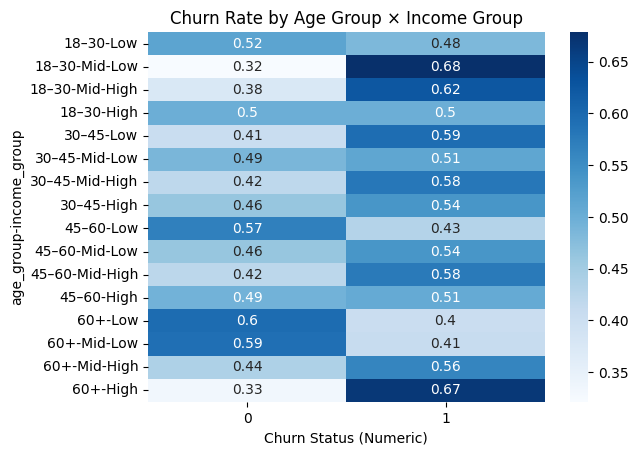

In [20]:
# Combining age and income to compare to churn

df["age_group"] = pd.cut(df["Age"], bins=[18, 30, 45, 60, 90],
                         labels=["18–30", "30–45", "45–60", "60+"])

df["income_group"] = pd.qcut(df["Monthly Income ($)"], q=4,
                             labels=["Low", "Mid-Low", "Mid-High", "High"])


crosstab = pd.crosstab(
    [df["age_group"], df["income_group"]],
    df["Churn Status (Numeric)"]
)

crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

sns.heatmap(crosstab_norm, annot=True, cmap="Blues")
plt.title("Churn Rate by Age Group × Income Group")
plt.savefig("heatmaps/churn_age_income_heatmap.png",
            dpi=300, bbox_inches="tight")
plt.show()

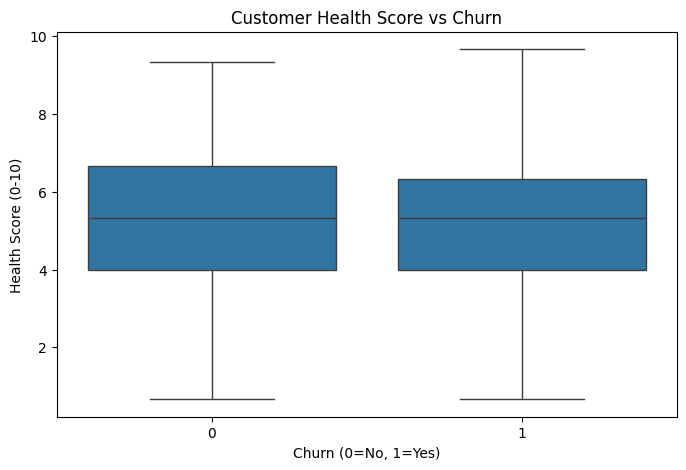

Correlation between Health Score and Churn: -0.03
    Customer ID  Subscription Length (Months)  \
0        C00001                            12   
1        C00002                            12   
2        C00003                             3   
3        C00004                             3   
4        C00005                            24   
..          ...                           ...   
995      C00996                             1   
996      C00997                             1   
997      C00998                             6   
998      C00999                             3   
999      C01000                             1   

     Customer Satisfaction Score (1-10)  Daily Watch Time (Hours)  \
0                                    10                      4.85   
1                                     8                      1.75   
2                                     4                      2.75   
3                                     7                      3.00   
4               

In [21]:
#  Combining Customer Satisfaction Score (1-10), Engagement Rate (1-10) and Support Queries Logged to compare to churn status

output_folder = Path("boxplot")
output_folder.mkdir(parents=True, exist_ok=True)

# Step 1: Normalize Support Queries to 0-10
scaler = MinMaxScaler(feature_range=(0, 10))
df['Support_Normalized'] = scaler.fit_transform(df[['Support Queries Logged']])

# Step 2: Invert Support Score (fewer queries = better)
df['Support_Inverted'] = 10 - df['Support_Normalized']


# Step 3: Combine into a Health Score (equal weights)
df['Health_Score'] = (df['Customer Satisfaction Score (1-10)'] + df['Engagement Rate (1-10)'] + df['Support_Inverted']) / 3

# Step 4: Visualize Health Score vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Status (Numeric)', y='Health_Score', data=df)
plt.title('Customer Health Score vs Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Health Score (0-10)')
plt.savefig("boxplot/healthscore.png",
            dpi=300, bbox_inches="tight")
plt.show()

# Step 5: Correlation check
correlation = df[['Health_Score', 'Churn Status (Numeric)']].corr().iloc[0,1]
print(f'Correlation between Health Score and Churn: {correlation:.2f}')

# Optional: Display the dataframe
print(df)